## MNIST 의 손글씨를 인공신경망을 이용한 딥러닝으로 구별해보자

별도의 필터링 없이 keras 에서 제공하는 함수만을 사용해서 정석대로 구현 하는 예제

In [38]:
import tensorflow
import tensorflow.keras as keras
import numpy 
import matplotlib.pyplot as plt
import numpy as np

In [39]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data(path="/home/msong/Deeplearning_Study/03_MNIST_SimpleClassification/mnist.npz")

In [40]:
input_shape = (28, 28) # 이미지 한장의 크기
number_of_classes = 10 # 손글씨 종류는 0 ~ 9 까지 10개

In [41]:
# 0~1 scaling 
x_train = x_train / 255.0
x_test = x_test / 255.0

# one hot encoding 
y_train = keras.utils.to_categorical(y_train, num_classes= number_of_classes)
y_test = keras.utils.to_categorical(y_test, num_classes= number_of_classes)

In [42]:
x_train.shape

(60000, 28, 28)

In [43]:
y_train.shape

(60000, 10)

In [47]:
model = keras.Sequential()

model.add( keras.layers.InputLayer(input_shape= input_shape) )
model.add( keras.layers.Flatten() )
model.add( keras.layers.Dense( 128 ) )
model.add( keras.layers.Dense( 64, activation='relu' ))
model.add( keras.layers.Dense( 32, activation='relu' ))
model.add( keras.layers.Dense( 10, activation='softmax' ))

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_31 (Dense)            (None, 128)               100480    
                                                                 
 dense_32 (Dense)            (None, 64)                8256      
                                                                 
 dense_33 (Dense)            (None, 32)                2080      
                                                                 
 dense_34 (Dense)            (None, 10)                330       
                                                                 
Total params: 111146 (434.16 KB)
Trainable params: 111146 (434.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [48]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(x_train, y_train, batch_size=256, epochs=20, validation_split=0.1)

Epoch 1/20
211/211 [==============================] - 2s 5ms/step - loss: 0.5015 - accuracy: 0.8518 - val_loss: 0.2013 - val_accuracy: 0.9415
Epoch 2/20
211/211 [==============================] - 1s 4ms/step - loss: 0.2118 - accuracy: 0.9386 - val_loss: 0.1517 - val_accuracy: 0.9577
Epoch 3/20
211/211 [==============================] - 1s 4ms/step - loss: 0.1616 - accuracy: 0.9527 - val_loss: 0.1365 - val_accuracy: 0.9623
Epoch 4/20
211/211 [==============================] - 1s 4ms/step - loss: 0.1322 - accuracy: 0.9605 - val_loss: 0.1138 - val_accuracy: 0.9673
Epoch 5/20
211/211 [==============================] - 1s 4ms/step - loss: 0.1102 - accuracy: 0.9676 - val_loss: 0.1126 - val_accuracy: 0.9660
Epoch 6/20
211/211 [==============================] - 1s 4ms/step - loss: 0.0972 - accuracy: 0.9711 - val_loss: 0.1063 - val_accuracy: 0.9690
Epoch 7/20
211/211 [==============================] - 1s 4ms/step - loss: 0.0866 - accuracy: 0.9739 - val_loss: 0.0983 - val_accuracy: 0.9733
Epoch 

In [49]:
model.evaluate(x = x_test, y = y_test )

313/313 [==============================] - 0s 1ms/step - loss: 0.1044 - accuracy: 0.9745


[0.10444801300764084, 0.9745000004768372]

In [64]:
def overwrite_mnist_image( image_of_28_28 ):
    canvas = np.random.uniform(0, 0.1, (50,50))
    x_shift = np.random.randint(1, 21) 
    y_shift = np.random.randint(1, 21) 
    canvas[ x_shift:x_shift+28 ,  y_shift:y_shift+28 ] =  canvas[ x_shift:x_shift+28 ,  y_shift:y_shift+28 ] + image_of_28_28
    return canvas 


In [83]:
enlarged_x_train = []
enlarged_x_test = [] 

for i in range(len(x_train)):
    enlarged_x_train.append(overwrite_mnist_image(x_train[i]))

for i in range(len(x_test)):
    enlarged_x_test.append(overwrite_mnist_image(x_test[i]))

enlarged_x_train = np.array(enlarged_x_train)
enlarged_x_test = np.array(enlarged_x_test)


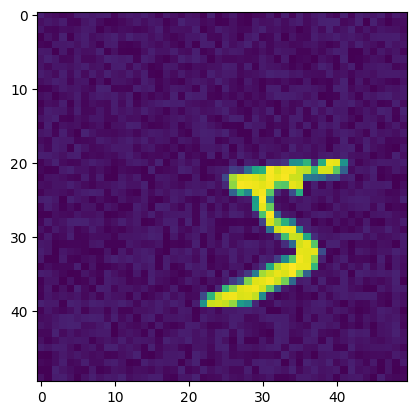

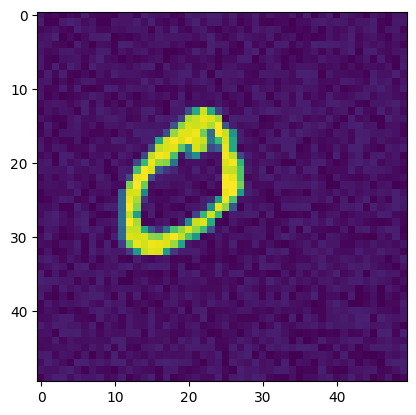

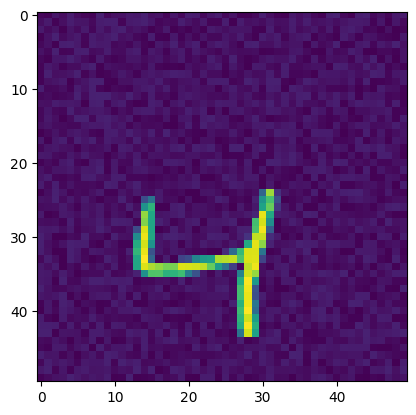

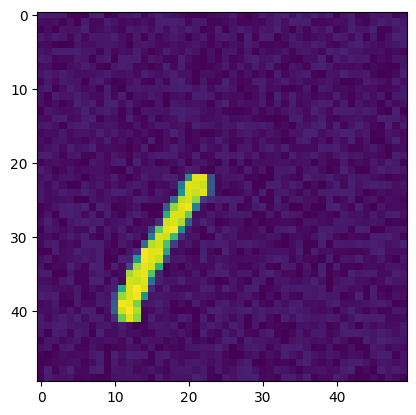

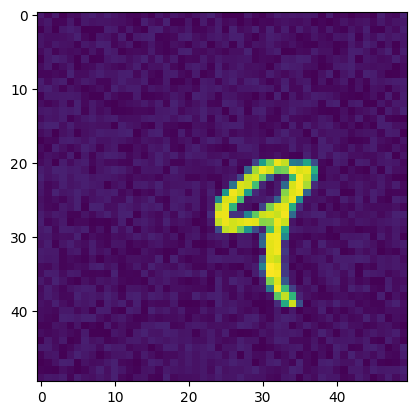

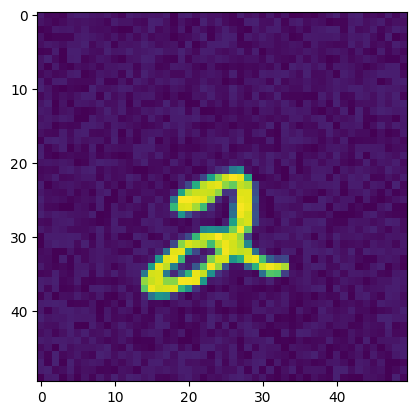

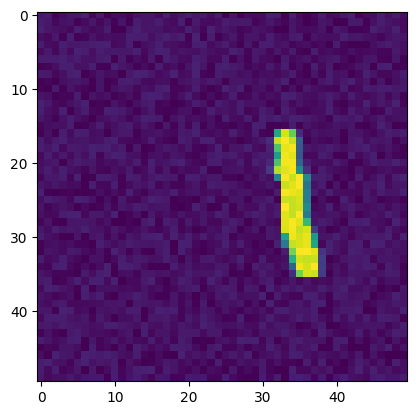

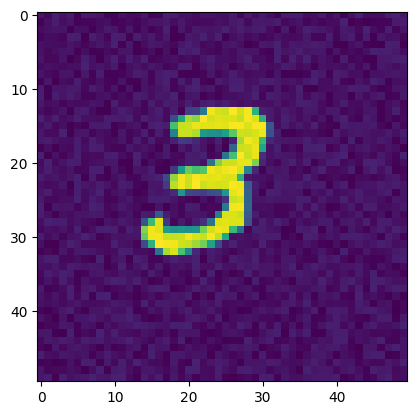

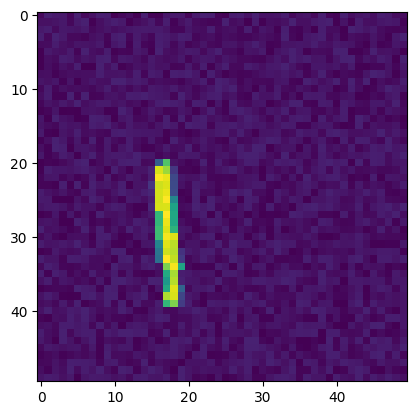

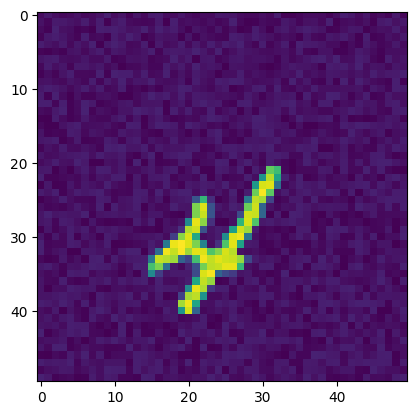

In [84]:
for i in range(10):
    fig = enlarged_x_train[i] 
    plt.imshow(fig)
    plt.show()

같은 모델에서 학습이 가능할까?

In [88]:
model = keras.Sequential()

model.add( keras.layers.InputLayer(input_shape= (50,50) ))
model.add( keras.layers.Flatten() )
model.add( keras.layers.Dense( 128 ) )
model.add( keras.layers.Dense( 64, activation='relu' ))
model.add( keras.layers.Dense( 32, activation='relu' ))
model.add( keras.layers.Dense( 10, activation='softmax' ))

model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 2500)              0         
                                                                 
 dense_39 (Dense)            (None, 128)               320128    
                                                                 
 dense_40 (Dense)            (None, 64)                8256      
                                                                 
 dense_41 (Dense)            (None, 32)                2080      
                                                                 
 dense_42 (Dense)            (None, 10)                330       
                                                                 
Total params: 330794 (1.26 MB)
Trainable params: 330794 (1.26 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [90]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(enlarged_x_train, y_train, batch_size=256, epochs=20, validation_split=0.1)

Epoch 1/20
211/211 [==============================] - 2s 5ms/step - loss: 1.8116 - accuracy: 0.3591 - val_loss: 1.2878 - val_accuracy: 0.5747
Epoch 2/20
211/211 [==============================] - 1s 5ms/step - loss: 1.0450 - accuracy: 0.6511 - val_loss: 0.8302 - val_accuracy: 0.7307
Epoch 3/20
211/211 [==============================] - 1s 5ms/step - loss: 0.7747 - accuracy: 0.7460 - val_loss: 0.7094 - val_accuracy: 0.7748
Epoch 4/20
211/211 [==============================] - 1s 5ms/step - loss: 0.6490 - accuracy: 0.7909 - val_loss: 0.6377 - val_accuracy: 0.7963
Epoch 5/20
211/211 [==============================] - 1s 5ms/step - loss: 0.5630 - accuracy: 0.8176 - val_loss: 0.5860 - val_accuracy: 0.8095
Epoch 6/20
211/211 [==============================] - 1s 4ms/step - loss: 0.5020 - accuracy: 0.8378 - val_loss: 0.5540 - val_accuracy: 0.8253
Epoch 7/20
211/211 [==============================] - 1s 5ms/step - loss: 0.4473 - accuracy: 0.8570 - val_loss: 0.5116 - val_accuracy: 0.8355
Epoch 

In [91]:
model.evaluate(enlarged_x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.6225 - accuracy: 0.8386


[0.622478723526001, 0.8385999798774719]